In [1]:
import numpy as np
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
clf = RandomForestClassifier(n_estimators = 100) 
from sklearn import metrics

def load(input_file):
    # comma delimited is the default
    df = pd.read_csv(input_file, header = 0)
    df = pd.read_csv(input_file, header = 0, delimiter = ";")

    df = df[:-19000]
    # remove the non-numeric columns
    df = df._get_numeric_data()
    
    # put the numeric column names in a python list
    features_names = list(df.columns.values)
    # create a numpy array with the numeric values for input into scikit-learn
    return df

def get_features_and_target(df , target_to_predicte):
    target=df[target_to_predicte]
    del df[target_to_predicte]
    features=df
    return features, target


df = load("trainingData.csv")
df

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.264300,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.621200,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.152400,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.570400,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.143600,4.864982e+06,0,0,122,2,11,13,1369909710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,100,100,100,100,100,100,100,100,100,100,...,100,-7344.968400,4.864750e+06,3,2,241,2,2,23,1371717038
933,100,100,100,100,100,100,100,100,100,100,...,100,-7337.232139,4.864753e+06,3,2,243,1,2,23,1371716980
934,100,100,100,100,100,100,100,100,100,100,...,100,-7407.379600,4.864800e+06,3,2,201,2,2,23,1371717405
935,100,100,100,100,100,100,100,100,100,100,...,100,-7347.108300,4.864748e+06,3,2,240,2,2,23,1371717261


In [2]:
df.iloc[1]

WAP001              1.000000e+02
WAP002              1.000000e+02
WAP003              1.000000e+02
WAP004              1.000000e+02
WAP005              1.000000e+02
                        ...     
SPACEID             1.060000e+02
RELATIVEPOSITION    2.000000e+00
USERID              2.000000e+00
PHONEID             2.300000e+01
TIMESTAMP           1.371714e+09
Name: 1, Length: 529, dtype: float64

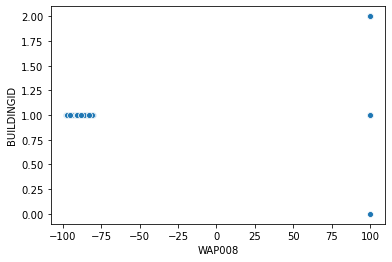

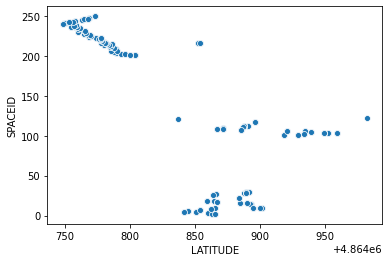

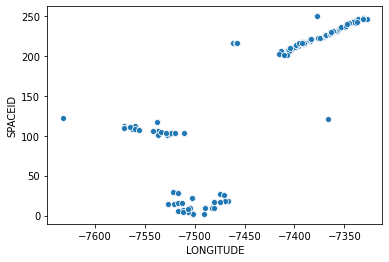

In [3]:
# visualisation 
import matplotlib.pyplot as plt
import seaborn as sns


def graphics(x, y): 
    ax = sns.scatterplot(x=x, y=y,                      

                         sizes=(20, 200), hue_norm=(0, 7),
                         legend="full", data=df)
    plt.show()
graphics("WAP008","BUILDINGID")  

graphics("LATITUDE","SPACEID")  
graphics("LONGITUDE","SPACEID")  

In [4]:
X, y =get_features_and_target(df, 'SPACEID')
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
print(np.asarray(X.iloc[1]))

[ 1.00000000e+02  1.00000000e+02  1.00000000e+02  1.00000000e+02
  1.00000000e+02  1.00000000e+02  1.00000000e+02  1.00000000e+02
  1.00000000e+02  1.00000000e+02  1.00000000e+02  1.00000000e+02
  1.00000000e+02  1.00000000e+02  1.00000000e+02  1.00000000e+02
  1.00000000e+02  1.00000000e+02  1.00000000e+02  1.00000000e+02
  1.00000000e+02  1.00000000e+02  1.00000000e+02  1.00000000e+02
  1.00000000e+02  1.00000000e+02  1.00000000e+02  1.00000000e+02
  1.00000000e+02  1.00000000e+02  1.00000000e+02  1.00000000e+02
  1.00000000e+02  1.00000000e+02  1.00000000e+02  1.00000000e+02
  1.00000000e+02  1.00000000e+02  1.00000000e+02  1.00000000e+02
  1.00000000e+02  1.00000000e+02  1.00000000e+02  1.00000000e+02
  1.00000000e+02  1.00000000e+02  1.00000000e+02  1.00000000e+02
  1.00000000e+02  1.00000000e+02  1.00000000e+02  1.00000000e+02
  1.00000000e+02  1.00000000e+02  1.00000000e+02  1.00000000e+02
  1.00000000e+02  1.00000000e+02  1.00000000e+02  1.00000000e+02
  1.00000000e+02  1.00000

In [5]:
clf.fit(X_train, np.asarray(y_train, dtype="|S6"))

RandomForestClassifier()

In [6]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)

In [7]:
# metrics are used to find accuracy or error   
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(np.asarray(y_test, dtype="|S6"), y_pred))

ACCURACY OF THE MODEL:  0.9290322580645162


In [8]:
len(df)

937

In [9]:
from sklearn.metrics import confusion_matrix
confusion_matrix(np.asarray(y_test, dtype="|S6"), y_pred)

array([[10,  0,  0, ...,  0,  0,  0],
       [ 0,  9,  0, ...,  0,  0,  0],
       [ 0,  0,  2, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  3,  0,  0],
       [ 0,  0,  0, ...,  0,  2,  0],
       [ 0,  0,  0, ...,  0,  0,  2]], dtype=int64)

In [10]:
from sklearn.preprocessing import StandardScaler
n = df.shape[0]
p= df.shape[1]
# =transformation  , centrage reduction 
sc  = StandardScaler()
Z  = sc.fit_transform(df)
print(Z)

[[ 0.          0.          0.         ... -0.04624973  0.04624973
  -0.0315466 ]
 [ 0.          0.          0.         ... -0.04624973  0.04624973
  -0.03225733]
 [ 0.          0.          0.         ... -0.04624973  0.04624973
  -0.02542078]
 ...
 [ 0.          0.          0.         ... -0.04624973  0.04624973
   0.03059148]
 [ 0.          0.          0.         ... -0.04624973  0.04624973
   0.02815469]
 [ 0.          0.          0.         ... -0.04624973  0.04624973
   0.03224985]]


In [11]:
from sklearn.decomposition import PCA
acp  = PCA (svd_solver='full')
coord  = acp.fit_transform(Z)

print (acp.n_components)
print(acp)
print(acp.explained_variance_)

None
PCA(svd_solver='full')
[2.61800645e+01 1.91518031e+01 1.16614207e+01 1.12505705e+01
 9.81966093e+00 7.45411374e+00 6.05623936e+00 5.09477180e+00
 4.87768549e+00 4.47307992e+00 3.81549028e+00 3.44078282e+00
 3.04563718e+00 2.71298585e+00 2.66604572e+00 2.53920046e+00
 2.45466457e+00 2.34087105e+00 2.28008341e+00 2.20339180e+00
 2.14856764e+00 2.09067114e+00 2.03143433e+00 1.97116298e+00
 1.89904903e+00 1.83376629e+00 1.80647671e+00 1.75560170e+00
 1.74157572e+00 1.67547412e+00 1.57701129e+00 1.54832302e+00
 1.52065400e+00 1.44445144e+00 1.42338381e+00 1.41740856e+00
 1.39413393e+00 1.37070707e+00 1.35307825e+00 1.28669989e+00
 1.26315867e+00 1.25396319e+00 1.22651024e+00 1.20630054e+00
 1.19316156e+00 1.16006688e+00 1.14948297e+00 1.12949212e+00
 1.11766851e+00 1.10159813e+00 1.09766872e+00 1.07825340e+00
 1.05851700e+00 1.04812829e+00 1.04073086e+00 1.03428591e+00
 1.00504348e+00 9.93440303e-01 9.87852456e-01 9.66564777e-01
 9.41483876e-01 9.29822690e-01 9.22902675e-01 9.18656395e

In [12]:
# K nearest - neighbor

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, np.asarray(y_train, dtype="|S6"))
y_pred =  neigh.predict(X_test)


In [13]:
# metrics are used to find accuracy or error   
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(np.asarray(y_test, dtype="|S6"), y_pred))

ACCURACY OF THE MODEL:  0.7032258064516129


In [14]:
confusion_matrix(np.asarray(y_test, dtype="|S6"), y_pred)

array([[9, 0, 0, ..., 0, 0, 0],
       [0, 6, 2, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 3, 0, 0],
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 0, 2]], dtype=int64)

In [15]:
from sklearn.neural_network import MLPClassifier

perceptron = MLPClassifier(random_state=1, max_iter=300)
perceptron.fit(X_train, np.asarray(y_train, dtype="|S6"))

y_pred = perceptron.predict(X_test)

In [16]:
# metrics are used to find accuracy or error   
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(np.asarray(y_test, dtype="|S6"), y_pred))

ACCURACY OF THE MODEL:  0.01935483870967742


In [17]:
confusion_matrix(np.asarray(y_test, dtype="|S6"), y_pred)

# cette methode confond beaucoup les deux Batiment donc reste moins pertinent que les autres 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Wow, 92% accuracy for Randomforest, let's create an API!


In [18]:
import pickle
from sklearn import tree
pickle.dump(clf, open('model.pkl','wb'))

In [ ]:
from flask import Flask, request, redirect, url_for, flash, jsonify
import numpy as np
import pickle as p
import json


app = Flask(__name__)


@app.route('/api/', methods=['POST'])
def makecalc():
    data = request.get_json()
    prediction = np.array2string(model.predict(data))

    return jsonify(prediction)

if __name__ == '__main__':
    modelfile = 'model.pkl'
    model = p.load(open(modelfile, 'rb'))
    app.run(debug=False, host='0.0.0.0')

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://0.0.0.0:5000/ (Press CTRL+C to quit)
